In [19]:
from typing import List, Union

import numpy as np
import json
import matplotlib.pyplot as plt

"""
Authot: Josue N Rivera

Potential field implementation
"""

import larp

In [20]:
# Parameters

max_iter = 10000
step_size = 0.01

tolerance_grad = 1e-4
tolerance_goal = 0.005
size = 120.0
mean_buffer = 8

attractive_constant = 1
repulsive_constant = 10
d_goal = 10.0
d_rep = 0.5

In [21]:
with open("scenes\surrounded.rgj") as file:
        rgjs:list = json.load(file)
    
field = larp.PotentialField(size=(size, size), rgjs=rgjs)
field_display = field.to_image(resolution=400, center_point=[45, 45])

def combined_attractive_force(point:Union[np.ndarray,larp.Point], end:larp.Point = np.array([0, 0]), constant=attractive_constant):

    point = np.array(point)
    end = np.array(end)
    diff =  point - end
    dist = np.linalg.norm(diff)

    if dist <= d_goal:
        return constant * diff
    else:
        return (d_goal * constant * diff)/dist

def repulsive_force(point:Union[np.ndarray,larp.Point], constant=repulsive_constant):
     
    dist2_o, idx_o = field.squared_dist(points=[point], reference_idx=True, scaled=True)
    dist2_o, idx_o = dist2_o[0], idx_o[0]
    dist_o = np.sqrt(dist2_o)

    if dist_o <= d_rep:
        repulsion_vector = field.repulsion_vectors(points=[point], filted_idx=[idx_o], min_dist_select=True)[0]
        return constant * ((1/d_rep - 1/dist_o)/dist2_o) * repulsion_vector
    else:
        return 0.0

def get_PF_route(start:larp.Point, end:larp.Point):
    current = start
    route_path = [current]
    average_point = np.ones((mean_buffer, 2))*1000

    i = 0
    while i < max_iter:
        direction = combined_attractive_force(current, end=end) + repulsive_force(current)
        unit_direction = direction/np.linalg.norm(direction)

        new_current = current - step_size*unit_direction
        route_path.append(new_current)
        i+=1

        average_point[i%mean_buffer] = current
        if np.linalg.norm(direction) < tolerance_grad or np.linalg.norm(average_point.mean(axis=0) - current) < tolerance_goal:
            break

        current = new_current

    return np.array(route_path)

In [22]:
start = (0, 25) # (x, y)
end = (62, 25)
route_path = get_PF_route(start=start, end=end)
found = np.linalg.norm(end - route_path[-1]) < step_size*3
print(f"Route found: {found}")

Route found: True


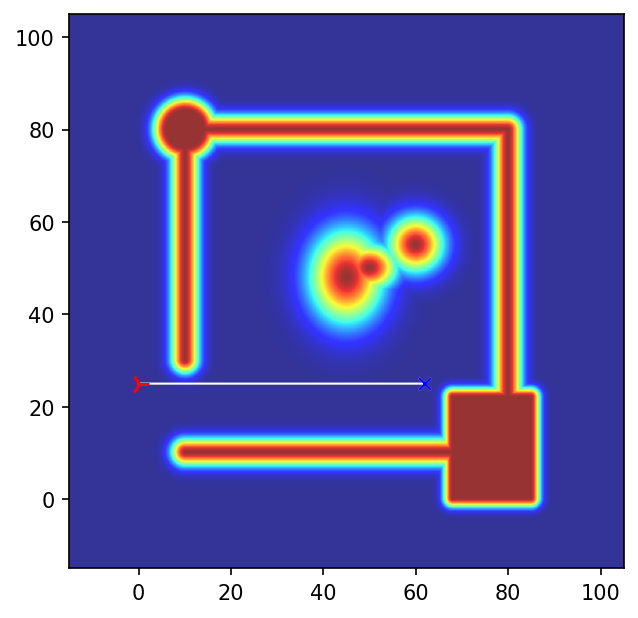

In [23]:

plt.figure(dpi=150)
plt.imshow(field_display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

In [24]:
# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")

Highest potential: 0.06217652402211632
Distance traveled: 62.00999999999623
Total area under route: 0.40200998886103156
Average area under route: 0.006482986435430672
Total area under route (scaled): 0.41758154540869946
Average area under route (scaled): 0.006734100071096998


Route found: False


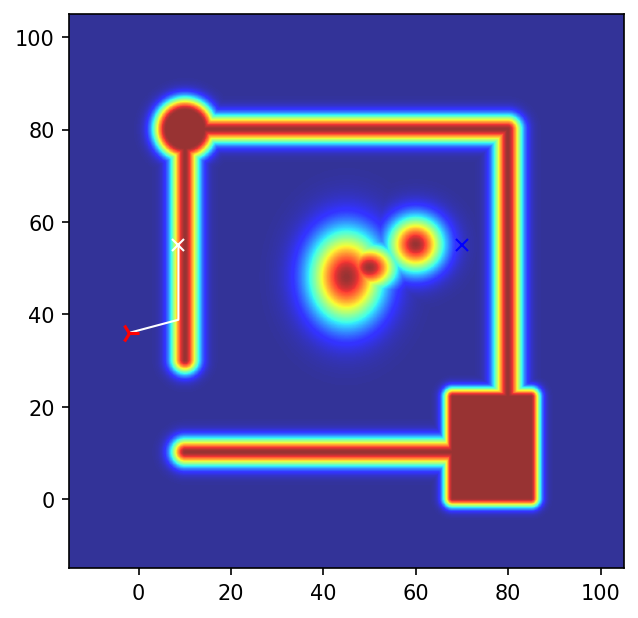

Highest potential: 0.8074640466281006
Distance traveled: 77.0499999999999
Total area under route: 54.676739267064576
Average area under route: 0.7096267263733245
Total area under route (scaled): 278.18978554843176
Average area under route (scaled): 3.6105098708427272


In [25]:
start = (-2, 36) # (x, y)
end = (70, 55)
route_path = get_PF_route(start=start, end=end)
found = np.linalg.norm(end - route_path[-1]) < step_size*3
print(f"Route found: {found}")

plt.figure(dpi=150)
plt.imshow(field_display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")

Route found: False


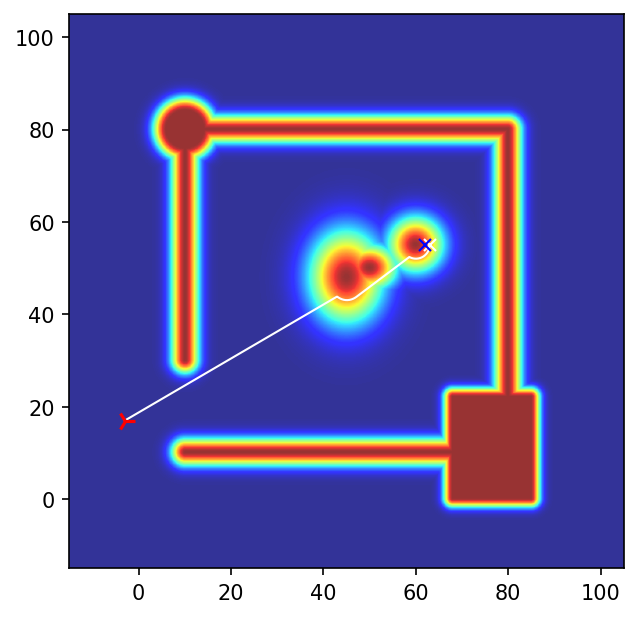

Highest potential: 0.787729348911833
Distance traveled: 86.83999999999978
Total area under route: 28.474478500846384
Average area under route: 0.3278958832432803
Total area under route (scaled): 106.26324729890555
Average area under route (scaled): 1.223667057794862


In [26]:
start = (-3, 17) # (x, y)
end = (62, 55)
route_path = get_PF_route(start=start, end=end)
found = np.linalg.norm(end - route_path[-1]) < step_size*3
print(f"Route found: {found}")

plt.figure(dpi=150)
plt.imshow(field_display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")

Route found: False


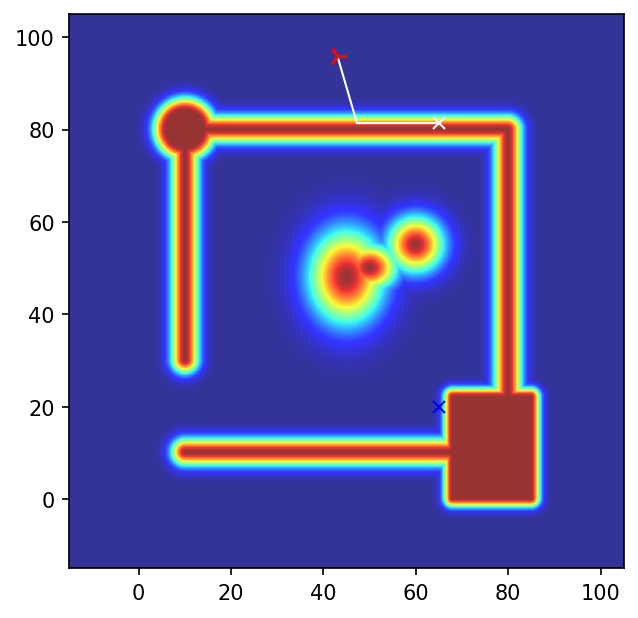

Highest potential: 0.8074640466280374
Distance traveled: 80.37000000000228
Total area under route: 53.9457141651572
Average area under route: 0.6712170482164448
Total area under route (scaled): 274.3630899019042
Average area under route (scaled): 3.4137500298854846


In [27]:
start = (43, 96) # (x, y)
end = (65, 20)
route_path = get_PF_route(start=start, end=end)
found = np.linalg.norm(end - route_path[-1]) < step_size*3
print(f"Route found: {found}")

plt.figure(dpi=150)
plt.imshow(field_display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")